In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
np.random.seed(42)

In [4]:
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])

In [6]:
len(data)

104

<Axes: ylabel='Count'>

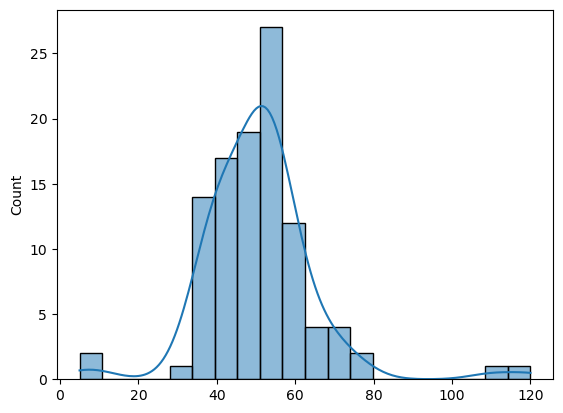

In [8]:
sns.histplot(data,kde=True)

In [9]:
df=pd.DataFrame(data,columns=['values'])

In [10]:
df

,values
0,35.846293
1,45.793547
2,46.572855
3,41.977227
4,48.387143
...,...
99,38.570297
100,10.000000
101,110.000000
102,5.000000


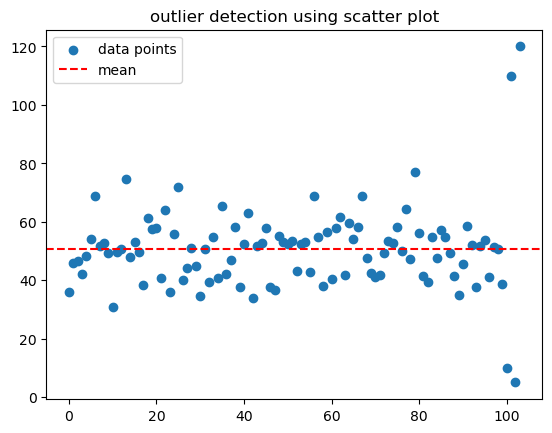

In [23]:
plt.scatter(range(len(df)),df['values'],label='data points')
plt.axhline(y=df['values'].mean(),color='r',linestyle='--',label='mean')
plt.title('outlier detection using scatter plot')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box plot to detect outliers')

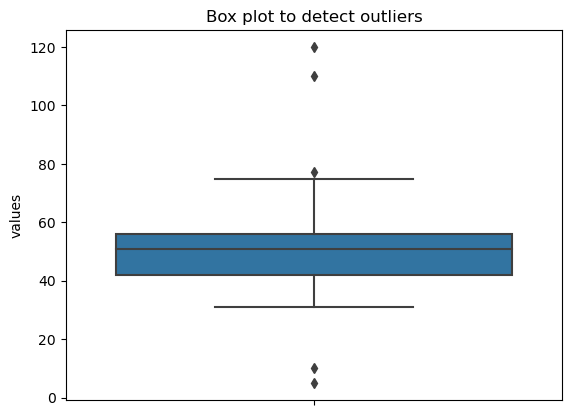

In [26]:
sns.boxplot(df,y='values')
plt.title('Box plot to detect outliers')

In [28]:
df['zscore']=zscore(df['values'])

In [35]:
df['outliers']= df['zscore'].apply(lambda x: 'outlier' if (x>3 or x<-3) else 'Normal')

In [38]:
df[df['outliers']=='outlier']

,values,zscore,outliers
101,110.0,4.167894,outlier
102,5.0,-3.205449,outlier
103,120.0,4.870117,outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 

In [42]:
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)

In [43]:
IQR = Q3-Q1

In [44]:
IQR

14.135879506034605

In [56]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [57]:
lower_bound

20.62589780782803

In [58]:
upper_bound

77.16941583196645

In [59]:
df['values']<lower_bound

0      False
1      False
2      False
3      False
4      False
       ...  
99     False
100     True
101    False
102     True
103    False
Name: values, Length: 104, dtype: bool

In [60]:
df['values']>upper_bound

0      False
1      False
2      False
3      False
4      False
       ...  
99     False
100    False
101     True
102    False
103     True
Name: values, Length: 104, dtype: bool

In [61]:
outliers = df[(df['values']<lower_bound) | (df['values']>upper_bound)]

In [62]:
outliers

,values,zscore,outliers
79,77.201692,1.864721,Normal
100,10.000000,-2.854338,Normal
101,110.000000,4.167894,outlier
102,5.000000,-3.205449,outlier
103,120.000000,4.870117,outlier


In [63]:
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])

#### Balancing dataset with downsampling
    Dataset with imbalanced number of class labels

In [88]:
df = pd.read_csv(r'C:\Users\CVR\Downloads\spam.csv',encoding='ISO-8859-1')

In [89]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [90]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [91]:
ham = df[df['v1']=='ham']

In [92]:
spam = df[df['v1']=='spam']

In [93]:
ham

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [94]:
spam

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [95]:
from sklearn.utils import resample

In [96]:
resampled_ham = resample(ham,replace=False,n_samples=len(spam),random_state=42)

In [97]:
resampled_ham

,v1,v2
3714,ham,"I am late,so call you tomorrow morning.take ca..."
1311,ham,U r too much close to my heart. If u go away i...
548,ham,Wait &lt;#&gt; min..
1324,ham,Can you call me plz. Your number shows out of ...
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
...,...,...
4992,ham,\HEY KATE
3117,ham,R u saying i should re order the slippers cos ...
4975,ham,You are gorgeous! keep those pix cumming :) th...
3505,ham,Nite...


In [98]:
final_df = pd.concat([resampled_ham,spam])

In [99]:
final_df

,v1,v2
3714,ham,"I am late,so call you tomorrow morning.take ca..."
1311,ham,U r too much close to my heart. If u go away i...
548,ham,Wait &lt;#&gt; min..
1324,ham,Can you call me plz. Your number shows out of ...
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [100]:
final_df['v1'].value_counts()

v1
ham     747
spam    747
Name: count, dtype: int64

#### Upsampling

In [101]:
ham

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [102]:
spam

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [104]:
spam_upsampling = resample(spam,replace=True,n_samples=len(ham),random_state=42)

In [105]:
spam_upsampling

,v1,v2
712,spam,08714712388 between 10am-7pm Cost 10p
3228,spam,Ur cash-balance is currently 500 pounds - to m...
1928,spam,Call from 08702490080 - tells u 2 call 0906635...
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
504,spam,+123 Congratulations - in this week's competit...
...,...,...
4246,spam,Text PASS to 69669 to collect your polyphonic ...
3673,spam,You have won a Nokia 7250i. This is what you g...
3618,spam,8007 25p 4 Alfie Moon's Children in Need song ...
3499,spam,Dorothy@kiefer.com (Bank of Granite issues Str...


In [106]:
upsampling_ = pd.concat([ham,spam_upsampling])

In [107]:
upsampling_['v1'].value_counts()

v1
ham     4825
spam    4825
Name: count, dtype: int64

In [110]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata


In [108]:
!pip install imbalanced-learn

##### 1.Smote to generate synthetic samples instead of duplicating existing ones.
##### 2.Convert categorical class labels into numeric form for smote to work.
##### 3.Apply SMOTE to balance the dataset
##### 4.Conver back to original categorical labels.
##### 5.Combine the resampled data into a final balanced dataset.

In [1]:
from imblearn.over_sampling import SMOTE

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
Note: you may need to restart the kernel to use updated packages.
